In [14]:
from langgraph.graph import StateGraph , START , END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()
from typing import TypedDict 
from langgraph.checkpoint.memory import InMemorySaver

In [15]:
model = ChatOpenAI()

In [16]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [ ]:
def joke_node(state:JokeState):
    prompt = f'Generate a joke on the topic {state["topic"]}'
    response = model.invoke(prompt)
    return {'joke':response}

In [18]:
def explain_node(state:JokeState):
    prompt = f'Explain the joke {state['joke']}'
    response = model.invoke(prompt)
    return {'explanation':response}

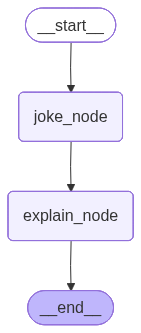

In [ ]:
graph = StateGraph(JokeState)


#add node 
graph.add_node('joke_node',joke_node)
graph.add_node('explain_node',explain_node)

#add edge
graph.add_edge(START , 'joke_node')
graph.add_edge('joke_node',  'explain_node')
graph.add_edge('explain_node', END)

 
checkpointer = InMemorySaver()   # for persisting the state
workflow  = graph.compile(checkpointer=checkpointer)
workflow

In [26]:
config = {'configurable':{'thread_id':'1'}}
workflow.invoke({'topic':'Nepal'},config=config)

{'topic': 'Nepal',
 'joke': AIMessage(content='Why did the mountain in Nepal never get lonely?\nBecause it had so many peaks to hang out with!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 14, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CPSXzhGnZyp2P5Wu0l4jlasT0Npt4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--df7aa36b-d249-4fec-ad89-60d7cf95c8ac-0', usage_metadata={'input_tokens': 14, 'output_tokens': 21, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'explanation': AIMessage(content='The joke is playing on the idea that mountains have peak

In [ ]:
workflow.get_state(config=config)     # to get state for respective thread stored in config

StateSnapshot(values={'topic': 'Nepal', 'joke': AIMessage(content='Why did the mountain in Nepal never get lonely?\nBecause it had so many peaks to hang out with!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 14, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CPSXzhGnZyp2P5Wu0l4jlasT0Npt4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--df7aa36b-d249-4fec-ad89-60d7cf95c8ac-0', usage_metadata={'input_tokens': 14, 'output_tokens': 21, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content='The joke is playing on the idea that 

In [ ]:
list(workflow.get_state_history(config=config)) # get the value of state{topic , joke , explanation} before each node

[StateSnapshot(values={'topic': 'Nepal', 'joke': AIMessage(content='Why did the mountain in Nepal never get lonely?\nBecause it had so many peaks to hang out with!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 14, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CPSXzhGnZyp2P5Wu0l4jlasT0Npt4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--df7aa36b-d249-4fec-ad89-60d7cf95c8ac-0', usage_metadata={'input_tokens': 14, 'output_tokens': 21, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content='The joke is playing on the idea that

In [29]:
config2 = {'configurable':{'thread_id':'2'}}
workflow.invoke({'topic':'Nepal'},config=config2)

{'topic': 'Nepal',
 'joke': AIMessage(content='Why did the mountain climber blush in Nepal?\n\nBecause he saw the peak of Mount Everest and it took his breath away!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 14, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CPSb4yex9R5YuM0i9xxhU0RywD8fJ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--aab48bf8-dd77-4300-9c56-620c1fdf2c83-0', usage_metadata={'input_tokens': 14, 'output_tokens': 25, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'explanation': AIMessage(content='The joke plays on the idea of the 

In [30]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'Nepal', 'joke': AIMessage(content='Why did the mountain climber blush in Nepal?\n\nBecause he saw the peak of Mount Everest and it took his breath away!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 14, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CPSb4yex9R5YuM0i9xxhU0RywD8fJ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--aab48bf8-dd77-4300-9c56-620c1fdf2c83-0', usage_metadata={'input_tokens': 14, 'output_tokens': 25, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content='The joke plays